# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np

%pip install chart-studio
%pip install cufflinks
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 3.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for cufflinks: fi

In [12]:
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
fitbit = pd.read_csv('../data/Fitbit2.csv', engine='python')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64


<Axes: xlabel='Months_encoded', ylabel='Steps'>

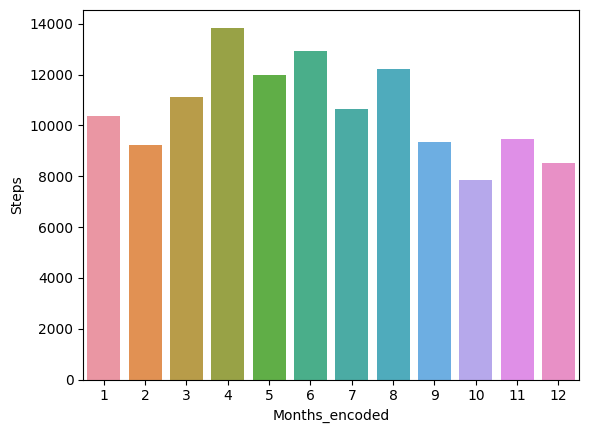

In [15]:
month = fitbit.groupby('Months_encoded')['Steps'].median()
print(month)

sns.barplot(
    x=month.index,
    y=fitbit.groupby('Months_encoded')['Steps'].median())

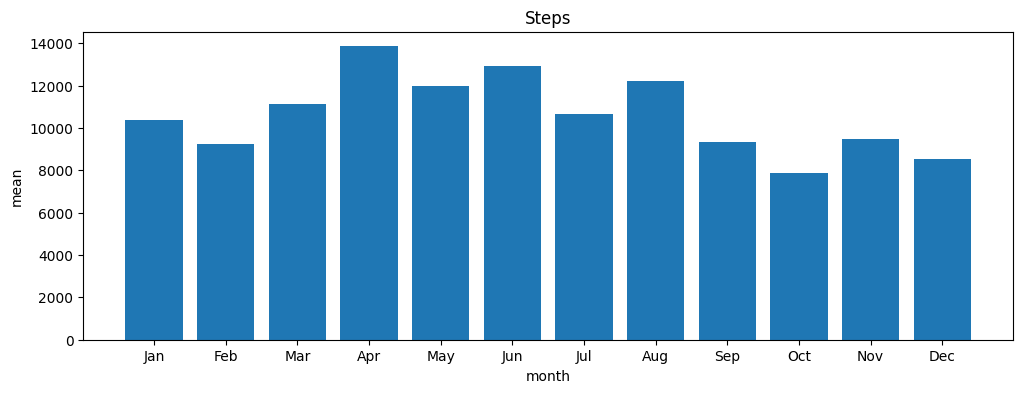

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(month.index, month.values)

plt.title('Steps')
plt.xlabel('month')
plt.ylabel('mean')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

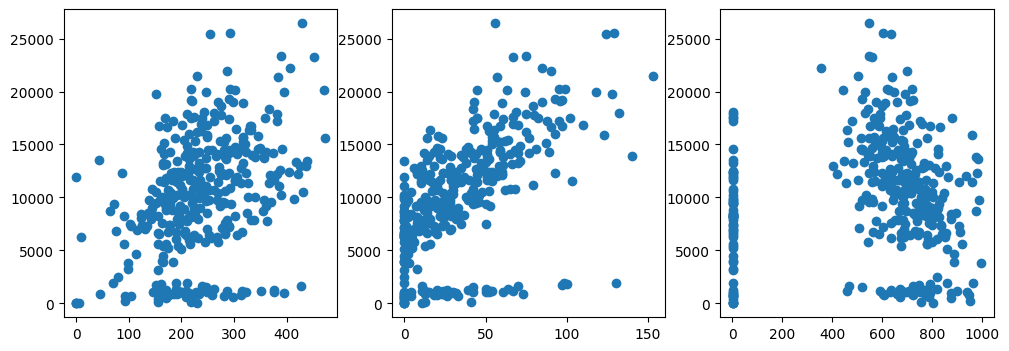

In [24]:
intensidad = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(len(intensidad)):
    plt.sca(axs[i])
    plt.scatter(fitbit[intensidad[i]], fitbit['Steps'])

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [27]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [28]:
titanic.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass   
0               1       0.0       3  \
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name  Gender        Age   
0                               Braund, Mr. Owen Harris    male  22.000000  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                                Heikkinen, Miss. Laina  female  26.000000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                              Allen, Mr. William Henry    male  35.000000   
...                            

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [29]:
# NUMERICAL VARIABLES
num_cols = df.select_dtypes(include=[np.number]).columns
print('Columnas numéricas: ', num_cols)

Columnas numéricas:  Index(['Calorie burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days_encoded', 'Work_or_Weekend', 'Hours Sleep',
       'Sleep efficiency', 'Yesterday_sleep', 'Yesterday_sleep_efficiency',
       'Months_encoded'],
      dtype='object')


In [30]:
# CATEGORICAL VARIABLES
cat_cols = df.select_dtypes(include=['object']).columns
print('Columnas categóricas: ', cat_cols)

Columnas categóricas:  Index(['Date', 'Days', 'Months'], dtype='object')


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

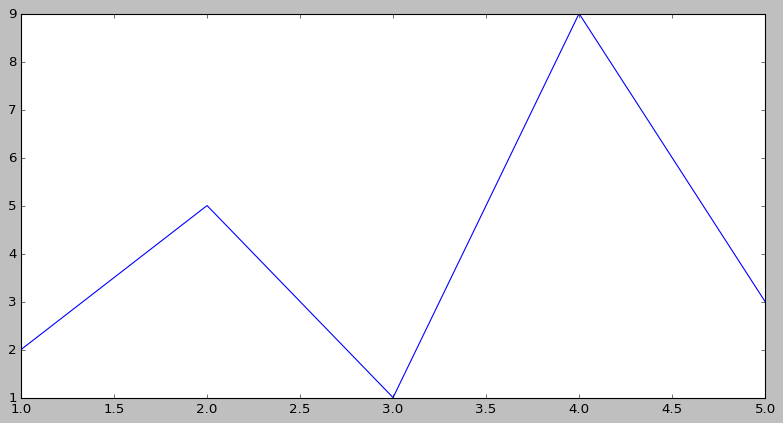

In [38]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(12,6))
# Le pongo números aleatorios porque si no sale vacía
ax.plot([1, 2, 3, 4, 5], [2, 5, 1, 9, 3])
plt.show()

#### Use the right visulalization to show the distribution of column `Age`.

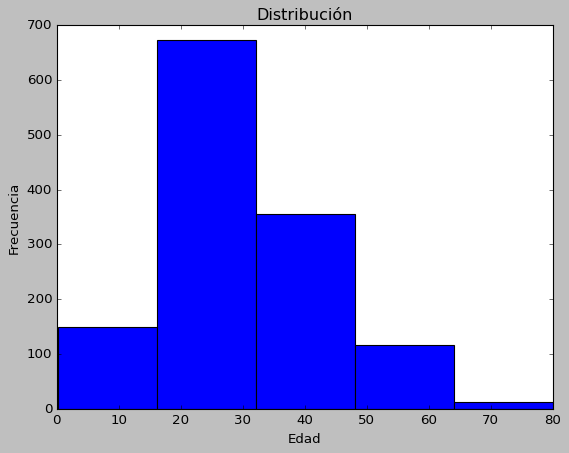

In [40]:
plt.hist(titanic['Age'], bins=5)

plt.title('Distribución')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

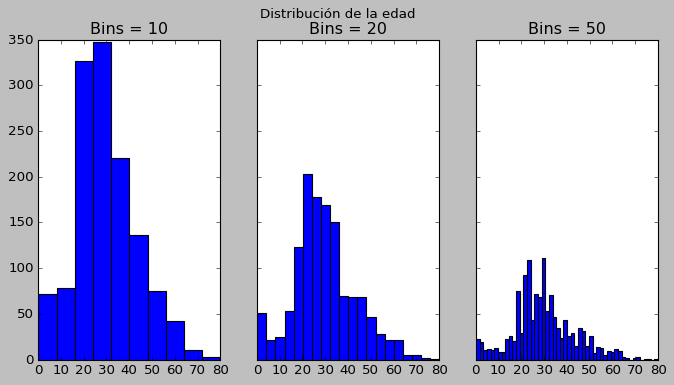

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].hist(titanic['Age'], bins=10)
axs[1].hist(titanic['Age'], bins=20)
axs[2].hist(titanic['Age'], bins=50)

axs[0].set_title('Bins = 10')
axs[1].set_title('Bins = 20')
axs[2].set_title('Bins = 50')
fig.suptitle('Distribución de la edad')

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""your comments here""

# Si es bin size es muy pequeño, se verán muchas barras pequeñas y no se entenderá bien.
# Si el bien size es demasiado grande quizá no sea demasiado descriptivo, porque habrá muy pocas barras.

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

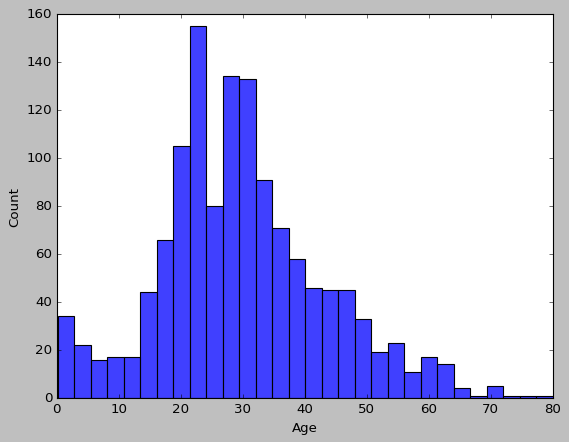

In [45]:
sns.histplot(x=titanic.Age,)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Count')

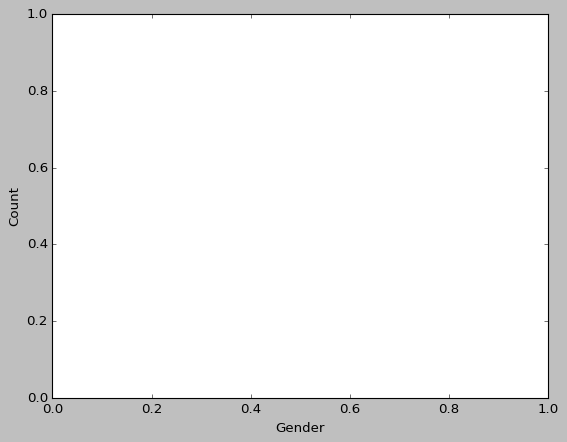

In [48]:
# Method 1 - matplotlib
fig, ax = plt.subplots()
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

<Axes: xlabel='Gender', ylabel='count'>

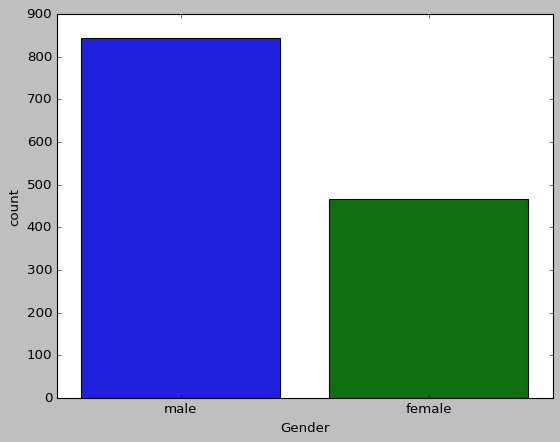

In [46]:
# Method 2 - seaborn
sns.countplot(x='Gender', data=titanic)

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

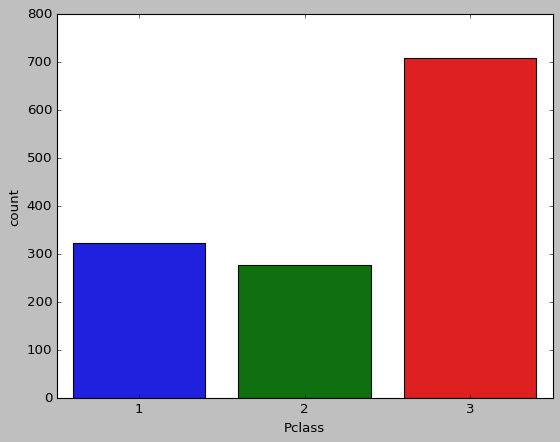

In [50]:
# your code here
sns.countplot(x=titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

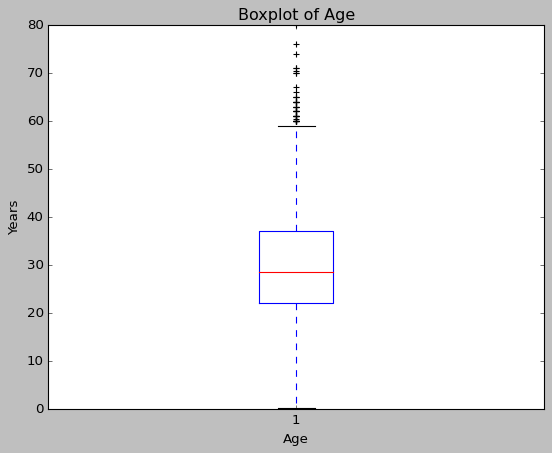

In [51]:
# your code here
plt.boxplot(titanic['Age'])
plt.xlabel("Age")
plt.ylabel("Years")
plt.title("Boxplot of Age")
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""your comments here"""
# El gráfico nos muestra que la mayoría de los datos se sitúan entre el 20 y el 40, dejando más allá del 60 algunos outliers

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

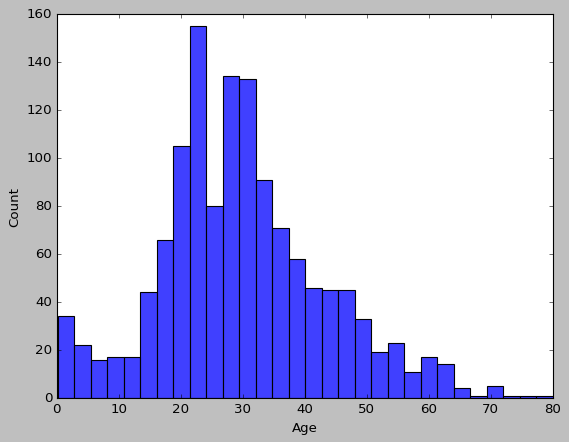

In [57]:
# your code here
sns.histplot(titanic['Age'])

ax2.set_xlabel("Age")
ax2.set_ylabel("Count")
ax2.set_title("Histogram of Age")

plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""your comments here"""
# Desde la edad de 10 hasta 20 y poco hay una notable subida, y la mayoría de la gente se sitúa alrededor de los 30.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

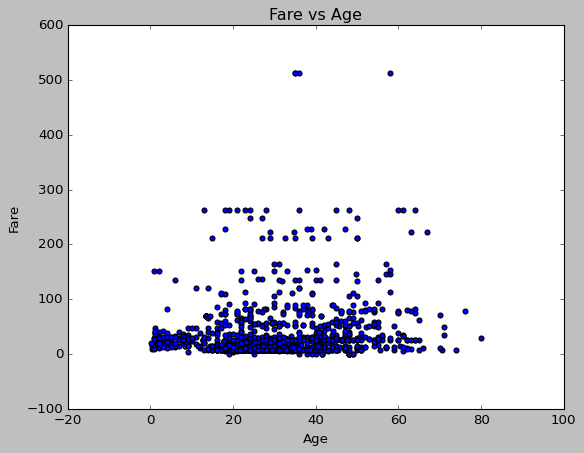

In [60]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age")
plt.show()

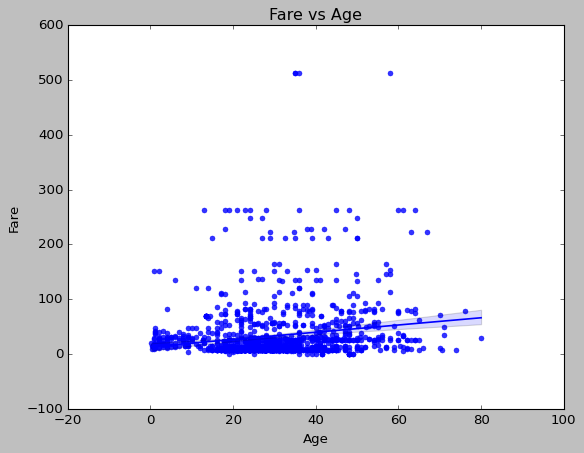

In [61]:
# Method 2 - seaborn
sns.regplot(x='Age', y='Fare', data=titanic)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age")

plt.show()

#### Plot the correlation matrix using seaborn.

In [67]:
# your code here
matriz = df.corr()
sns.heatmap(matriz, annot = True)
plt.show()

# convierto la date a float, porque es una string y no me está funcionando:

from datetime import datetime

date_str = '2015-05-08'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

# Sigue sin funcionarme, voy a seguir con el otro lab y cuando termine intento resolver esto.

ValueError: could not convert string to float: '2015-05-08'

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

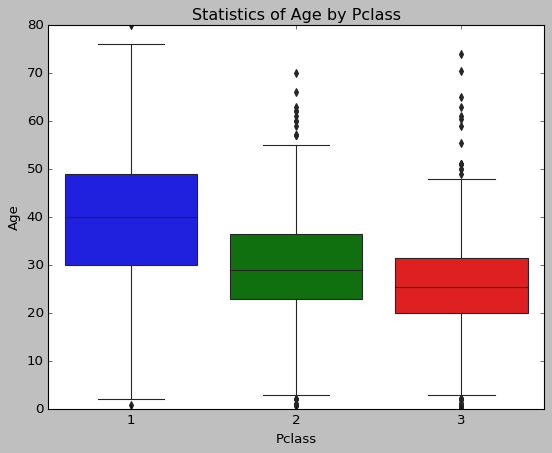

In [71]:
# your code here
pclass_col = [col for col in titanic.columns if 'class' in col.lower()][0]

sns.boxplot(x=pclass_col, y='Age', data=titanic)

plt.title('Statistics of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

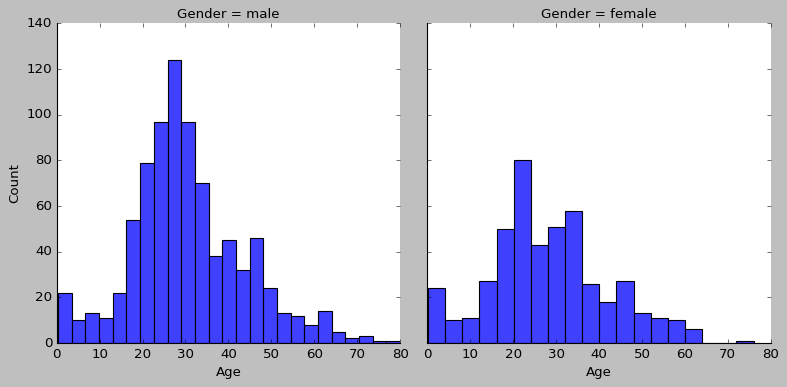

In [74]:
# your code here
hist = sns.FacetGrid(titanic, col='Gender', height=5)
hist.map(sns.histplot, 'Age');